In [13]:
import tensorflow.compat.v1 as tf
from sklearn.linear_model import LinearRegression

tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import r2_score



defined a file path for a job_data.csv and read it into a pandas DataFrame called df, and printed the first 3 rows of the DataFrame to examine the data.

In [14]:
address = r'jobs_in_data.csv'  # Defining the file path for the CSV file
df = pd.read_csv(address)  # Reading the data from CSV file into a DataFrame 'df'

df.head(3) # Printing the first 3 rows of the DataFrame to examine the data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


 Perform one-hot encoding on categorical columns

In [15]:
df_encoded = pd.get_dummies(df)
df_encoded.head() # Printing the first 5 rows of the DataFrame to examine the data

,work_year,salary,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,88000,95012,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2023,186000,186000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,2023,81800,81800,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2023,212000,212000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2023,93300,93300,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [16]:
# Divide the 'salary' column by 1000
df_encoded['salary'] /= 1000
df_encoded['salary_in_usd'] /= 1000

# Splitting the data into features (X) and target variable (y)

X = df_encoded.drop(columns=['salary','salary_in_usd'])  # Drop the target column
y = df_encoded['salary_in_usd']  # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("root mse",math.sqrt(mse) )


Mean Squared Error: 2.8615430583453614e+27
root mse 53493392660639.516


The Mean Squared Error after one-hot encoding is 2.7860732177114695e+33.
Now we will try to improve the result.

Assigning development levels to countries based on GDP per capita thresholds and performing one-hot encoding to create additional features.

In [17]:
average_salary_usd_test = y_test.mean()
print("Average Salary in USD (Test Set):", average_salary_usd_test)

Average Salary in USD (Test Set): 152.27193479422772


In [18]:
# Predicting the average salary in USD for every sample in the test set
y_pred_average = np.full_like(y_test, average_salary_usd_test)

# Calculating the Mean Squared Error
mse_average = mean_squared_error(y_test, y_pred_average)
print("Mean Squared Error (Predicting Average Salary in USD):", mse_average)
print("root mse",math.sqrt(mse_average) )


Mean Squared Error (Predicting Average Salary in USD): 4147.1373405826
root mse 64.39827125461211


In [19]:
unique_locations = df['company_location'].unique()

# Printing all unique options in the 'company_location' column
# for location in unique_locations:
#     print(location)

In [20]:
# Placeholder GDP per capital values for each country (in USD)
country_gdp_per_capital = {
    'Germany': 52000,
    'United States': 65000,
    'United Kingdom': 48000,
    'Canada': 45000,
    'Spain': 38000,
    'Ireland': 65000,
    'South Africa': 6500,
    'Poland': 33000,
    'France': 42000,
    'Netherlands': 53000,
    'Luxembourg': 115000,
    'Lithuania': 32000,
    'Portugal': 29000,
    'Gibraltar': 89000,
    'Australia': 54000,
    'Colombia': 14800,
    'Ukraine': 9500,
    'Slovenia': 38000,
    'Romania': 13000,
    'Greece': 29000,
    'India': 2200,
    'Latvia': 32000,
    'Mauritius': 11000,
    'Russia': 11000,
    'Italy': 35000,
    'South Korea': 42000,
    'Estonia': 32000,
    'Czech Republic': 38000,
    'Brazil': 8900,
    'Qatar': 62000,
    'Kenya': 1800,
    'Denmark': 60000,
    'Ghana': 2200,
    'Sweden': 54000,
    'Turkey': 11000,
    'Switzerland': 83000,
    'Andorra': 49000,
    'Ecuador': 6600,
    'Mexico': 9900,
    'Israel': 42000,
    'Nigeria': 2400,
    'Saudi Arabia': 22000,
    'Argentina': 11600,
    'Japan': 42000,
    'Central African Republic': 700,
    'Finland': 53000,
    'Singapore': 65000,
    'Croatia': 27000,
    'Armenia': 4400,
    'Bosnia and Herzegovina': 11900,
    'Pakistan': 1600,
    'Iran': 6000,
    'Bahamas': 31000,
    'Austria': 54000,
    'Puerto Rico': 39100,
    'American Samoa': 14000,
    'Thailand': 7800,
    'Philippines': 3500,
    'Belgium': 51000,
    'Egypt': 3000,
    'Indonesia': 4400,
    'United Arab Emirates': 43000,
    'Malaysia': 13000,
    'Honduras': 2500,
    'Algeria': 4200,
    'Iraq': 5700,
    'China': 11000,
    'New Zealand': 44000,
    'Moldova': 3100,
    'Malta': 45000
}

In [21]:
# Define thresholds for GDP per capita (or any other criterion you choose)
high_income_threshold = 40000  # GDP per capita above this value will be considered first world
middle_income_threshold = 10000  # GDP per capita between this and high_income_threshold will be considered second world

# Create a dictionary to map country names to their corresponding development levels
development_levels = {}
for country in unique_locations:
    # Assign development levels based on GDP per capita
    if country in country_gdp_per_capital:
        if country_gdp_per_capital[country] > high_income_threshold:
            development_levels[country] = 'First World'
        elif country_gdp_per_capital[country] > middle_income_threshold:
            development_levels[country] = 'Second World'
        else:
            development_levels[country] = 'Third World'
    else:
        development_levels[country] = 'Data Not Available'  # Handle missing GDP per capita data

# Create a new column 'development_level' based on the assigned levels
df['development_level'] = df['company_location'].map(development_levels)

# Perform one-hot encoding on all categorical columns
df_encoded = pd.get_dummies(df)

In [22]:
# Splitting the data into features (X) and target variable (y)
# X = df_encoded.drop(columns=['salary','salary_in_usd'])  # Drop the target column
# y = df_encoded['salary']  # Target column

# Training the model
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", math.sqrt(mse))


Mean Squared Error: 2.8615430583453614e+27
Root Mean Squared Error: 53493392660639.516


The Mean Squared Error after add GDP feature is 1.044927689722729e+33.

Reducing the mean squared error (MSE) from 2.7860732177114695e+33 to 1.044927689722729e+33 indicates an improvement in the performance of our model.

In [23]:
# Interaction Terms
df['work_year_experience'] = df['work_year'] * df['experience_level']
df['work_year_job_category'] = df['work_year'] * df['job_category']
df['salary_divide_dolar'] = df['salary_in_usd']/df['salary']

# Aggregate Statistics
agg_salary_by_job_category = df.groupby('job_category')['salary'].agg(['mean', 'median', 'std']).reset_index()
agg_salary_by_job_category.columns = ['job_category', 'avg_salary_job_category', 'median_salary_job_category', 'std_salary_job_category']
df = df.merge(agg_salary_by_job_category, on='job_category', how='left')

# Temporal Trends (if applicable)
# Example: You can calculate the average salary trend over the years
agg_salary_by_year = df.groupby('work_year')['salary'].mean().reset_index()
agg_salary_by_year.columns = ['work_year', 'avg_salary_year']
df = df.merge(agg_salary_by_year, on='work_year', how='left')

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df)

# Splitting the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['salary','salary_in_usd'])  # Drop the target column
y = df_encoded['salary']  # Target column

# Training the model
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Improved Mean Squared Error:", mse)
print("Root Mean Squared Error:", math.sqrt(mse))

Improved Mean Squared Error: 2.8615430583453614e+27
Root Mean Squared Error: 53493392660639.516


In [24]:
# Encoding categorical variables into numerical values
label_encoder = LabelEncoder()
df['employment_type_encoded'] = label_encoder.fit_transform(df['employment_type'])
df['job_title_encoded'] = label_encoder.fit_transform(df['job_title'])

# Creating interaction features
df['employment_type_job_title'] = df['employment_type_encoded'] * df['job_title_encoded']

# Perform one-hot encoding on the updated DataFrame
df_encoded = pd.get_dummies(df)

# Splitting the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['salary', 'salary_in_usd'])  
y = df_encoded['salary']  

# Training the model
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after feature engineering:", mse)
print("Root Mean Squared Error after feature engineering:", math.sqrt(mse))


Mean Squared Error after feature engineering: 2.8615430583453614e+27
Root Mean Squared Error after feature engineering: 53493392660639.516


In [25]:
# Encoding categorical variables into numerical values
label_encoder = LabelEncoder()
df['work_setting_encoded'] = label_encoder.fit_transform(df['work_setting'])
df['job_category_encoded'] = label_encoder.fit_transform(df['job_category'])

# Creating interaction features
df['work_setting_job_category'] = df['work_setting_encoded'] * df['job_category_encoded']

# Perform one-hot encoding on the updated DataFrame
df_encoded = pd.get_dummies(df)

# Splitting the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['salary', 'salary_in_usd'])  
y = df_encoded['salary']  

# Training the model
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after feature engineering:", mse)
print("Root Mean Squared Error after feature engineering:", math.sqrt(mse))


Mean Squared Error after feature engineering: 2.8615430583453614e+27
Root Mean Squared Error after feature engineering: 53493392660639.516


In [26]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

In [27]:
# Calculate the mean squared error for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)
print("Root Mean Squared Error (Ridge Regression):", math.sqrt(mse_ridge))

Mean Squared Error (Ridge Regression): 2617.9634417664215
Root Mean Squared Error (Ridge Regression): 51.166037972139506


Mean Squared Error (Ridge Regression): 2602098554.267593


In [28]:
# Define and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters such as n_estimators
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", math.sqrt(mse_rf))

Mean Squared Error (Random Forest): 2617.458439590381
Root Mean Squared Error (Random Forest): 51.16110279880977


In [29]:
# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust hyperparameters
xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Squared Error for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)
print("root MSE", math.sqrt(mse_xgb))

Mean Squared Error (XGBoost): 2555.49306496129
root MSE 50.55188488040075


Mean Squared Error (XGBoost): 2540649430.884165

when predict the average: root mse 50.55188488040075

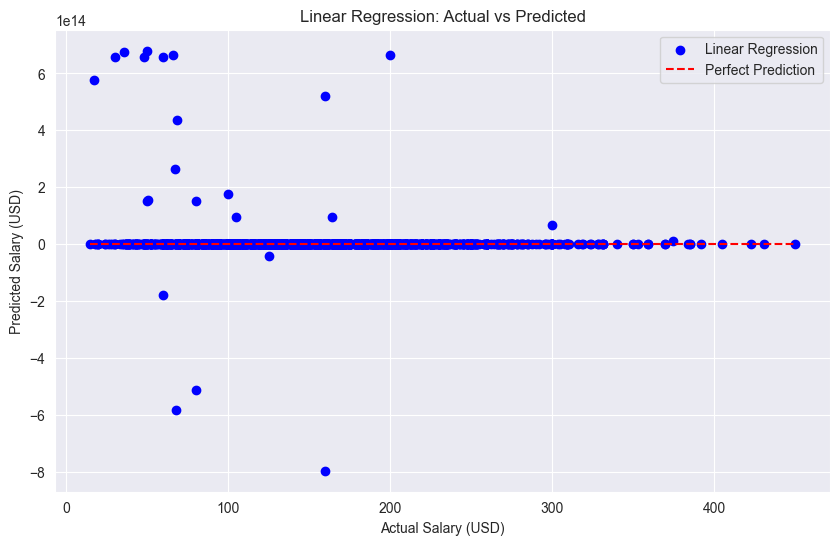

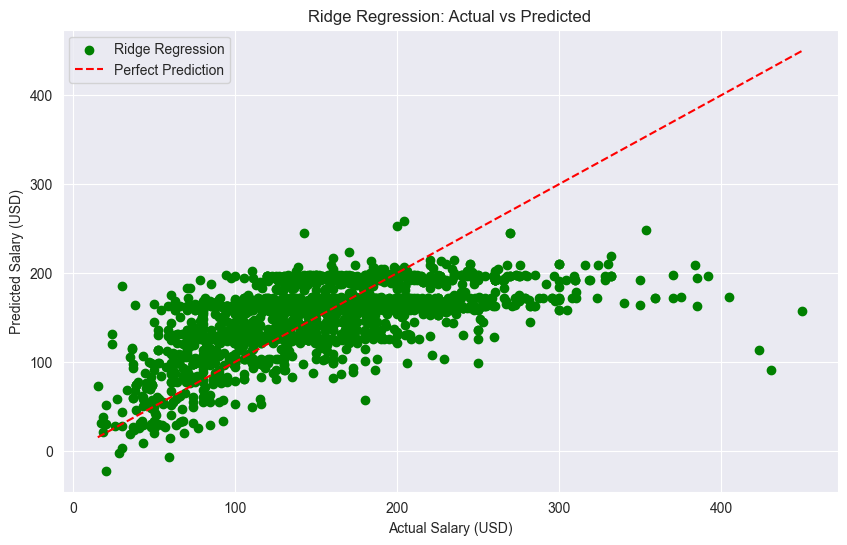

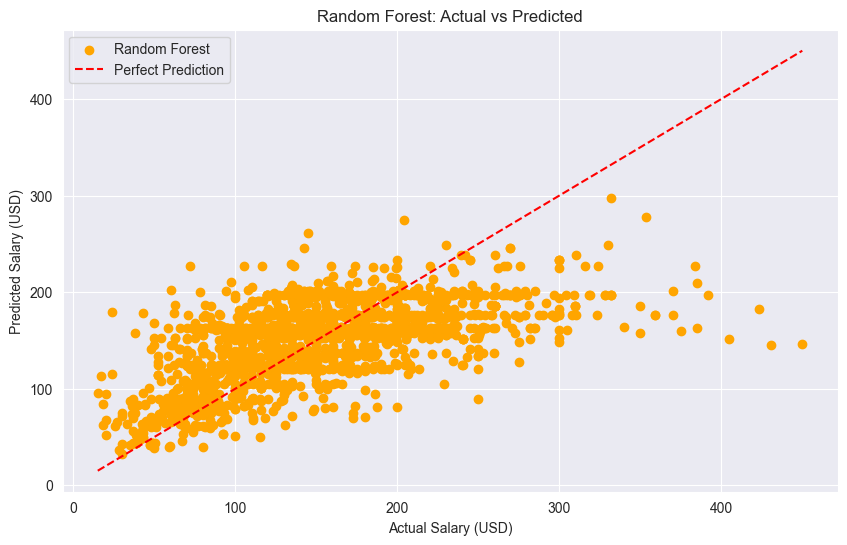

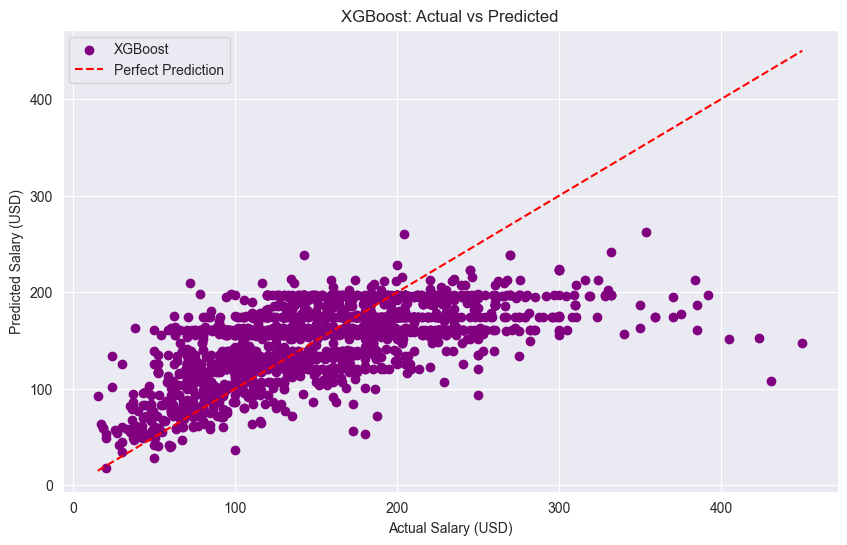

In [30]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.show()

# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.show()

# Scatter plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='purple', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.show()


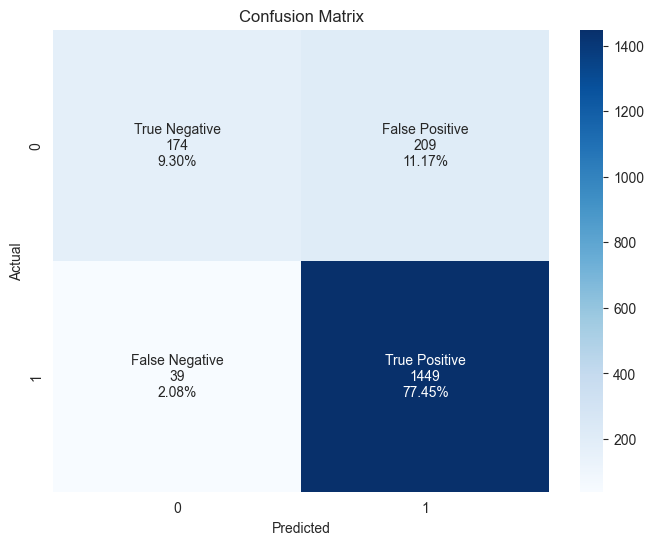

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define thresholds for classification
threshold_negative = 0
threshold_positive = 100  # Define a suitable threshold based on your problem

# Classify predictions into four categories
y_test_class = (y_test >= threshold_positive)
y_pred_class = (y_pred_xgb >= threshold_positive)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Calculate total count
total_count = np.sum(conf_matrix)

# Calculate percentages
percentages = conf_matrix / total_count * 100

# Define labels for each cell with count and percentage
labels = np.array([[f'True Negative\n{conf_matrix[0, 0]}\n{percentages[0, 0]:.2f}%',
                    f'False Positive\n{conf_matrix[0, 1]}\n{percentages[0, 1]:.2f}%'],
                   [f'False Negative\n{conf_matrix[1, 0]}\n{percentages[1, 0]:.2f}%',
                    f'True Positive\n{conf_matrix[1, 1]}\n{percentages[1, 1]:.2f}%']])

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# Calculate precision
precision = precision_score(y_test_class, y_pred_class)

# Calculate recall
recall = recall_score(y_test_class, y_pred_class)

# Print the values
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.8674505611972207
Precision: 0.8739445114595898
Recall: 0.9737903225806451


In [34]:
# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, y_pred)
accuracy = np.round(r2 * 100, 2)
print("Accuracy:", accuracy)

NameError: name 'X_test_reshaped' is not defined